<a href="https://colab.research.google.com/github/Gregory-lab-eng/python_Vistula/blob/main/Lab5_Strakhov_75209.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1

Kompresja: zachowano 1103/11025 współczynników
Stopień kompresji: 90.0%
Średni błąd kwadratowy: 0.000060


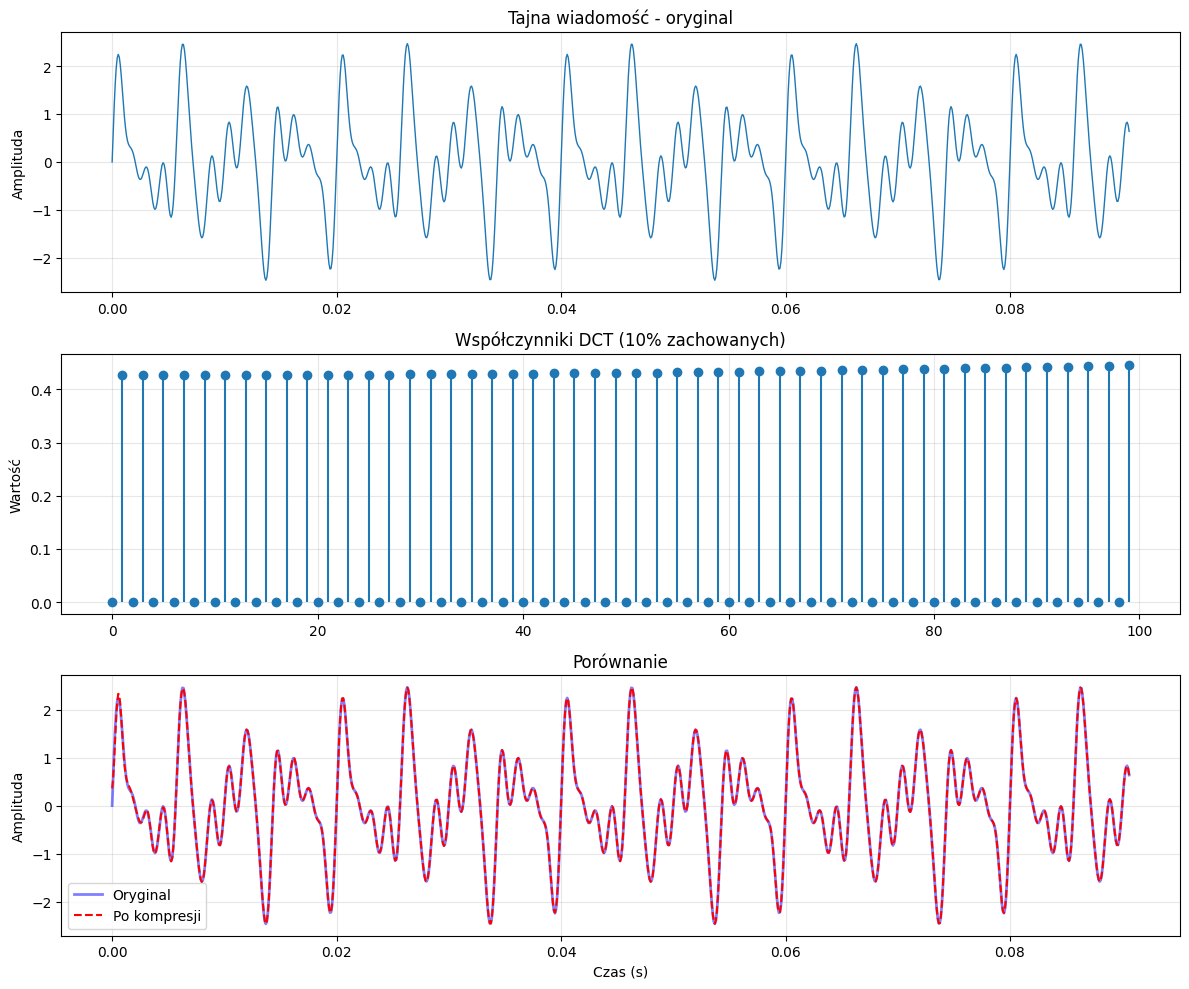


Wniosek: Mimo 90% kompresji, wiadomość jest nadal rozpoznawalna!
To jest podstawa kompresji stratnej w MP3 i JPEG!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

# Parametry
duration = 1.0
framerate = 11025
times = np.linspace(0, duration, int(duration * framerate))

# Tajna wiadomość: 4 częstotliwości (można je zmapować na litery)
secret_freqs = [200, 350, 500, 700]  # Hz
secret_amps = [1.0, 0.8, 0.6, 0.4]

# Generowanie wiadomości
secret_message = np.zeros(len(times))
for freq, amp in zip(secret_freqs, secret_amps):
    secret_message += amp * np.sin(2*np.pi*freq*times)

# Kompresja DCT
dct_coeffs = fftpack.dct(secret_message, type=2, norm='ortho')

# Zerowanie 90% najmniejszych współczynników
threshold = np.percentile(np.abs(dct_coeffs), 90)
dct_compressed = dct_coeffs.copy()
dct_compressed[np.abs(dct_coeffs) < threshold] = 0

# Rekonstrukcja
reconstructed = fftpack.idct(dct_compressed, type=2, norm='ortho')

# Statystyki
n_nonzero = np.sum(dct_compressed != 0)
compression_ratio = 100 * (1 - n_nonzero / len(dct_coeffs))

print(f"Kompresja: zachowano {n_nonzero}/{len(dct_coeffs)} współczynników")
print(f"Stopień kompresji: {compression_ratio:.1f}%")

# Błąd
mse = np.mean((secret_message - reconstructed)**2)
print(f"Średni błąd kwadratowy: {mse:.6f}")

# Wykres
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# Oryginał
axes[0].plot(times[:1000], secret_message[:1000], linewidth=1)
axes[0].set_title('Tajna wiadomość - oryginal')
axes[0].set_ylabel('Amplituda')
axes[0].grid(True, alpha=0.3)

# Współczynniki DCT
axes[1].stem(dct_compressed[:100], basefmt=' ')
axes[1].set_title(f'Współczynniki DCT (10% zachowanych)')
axes[1].set_ylabel('Wartość')
axes[1].grid(True, alpha=0.3)

# Porównanie
axes[2].plot(times[:1000], secret_message[:1000], 'b-',
            alpha=0.5, label='Oryginal', linewidth=2)
axes[2].plot(times[:1000], reconstructed[:1000], 'r--',
            label='Po kompresji', linewidth=1.5)
axes[2].set_title('Porównanie')
axes[2].set_xlabel('Czas (s)')
axes[2].set_ylabel('Amplituda')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nWniosek: Mimo 90% kompresji, wiadomość jest nadal rozpoznawalna!")
print("To jest podstawa kompresji stratnej w MP3 i JPEG!")


2

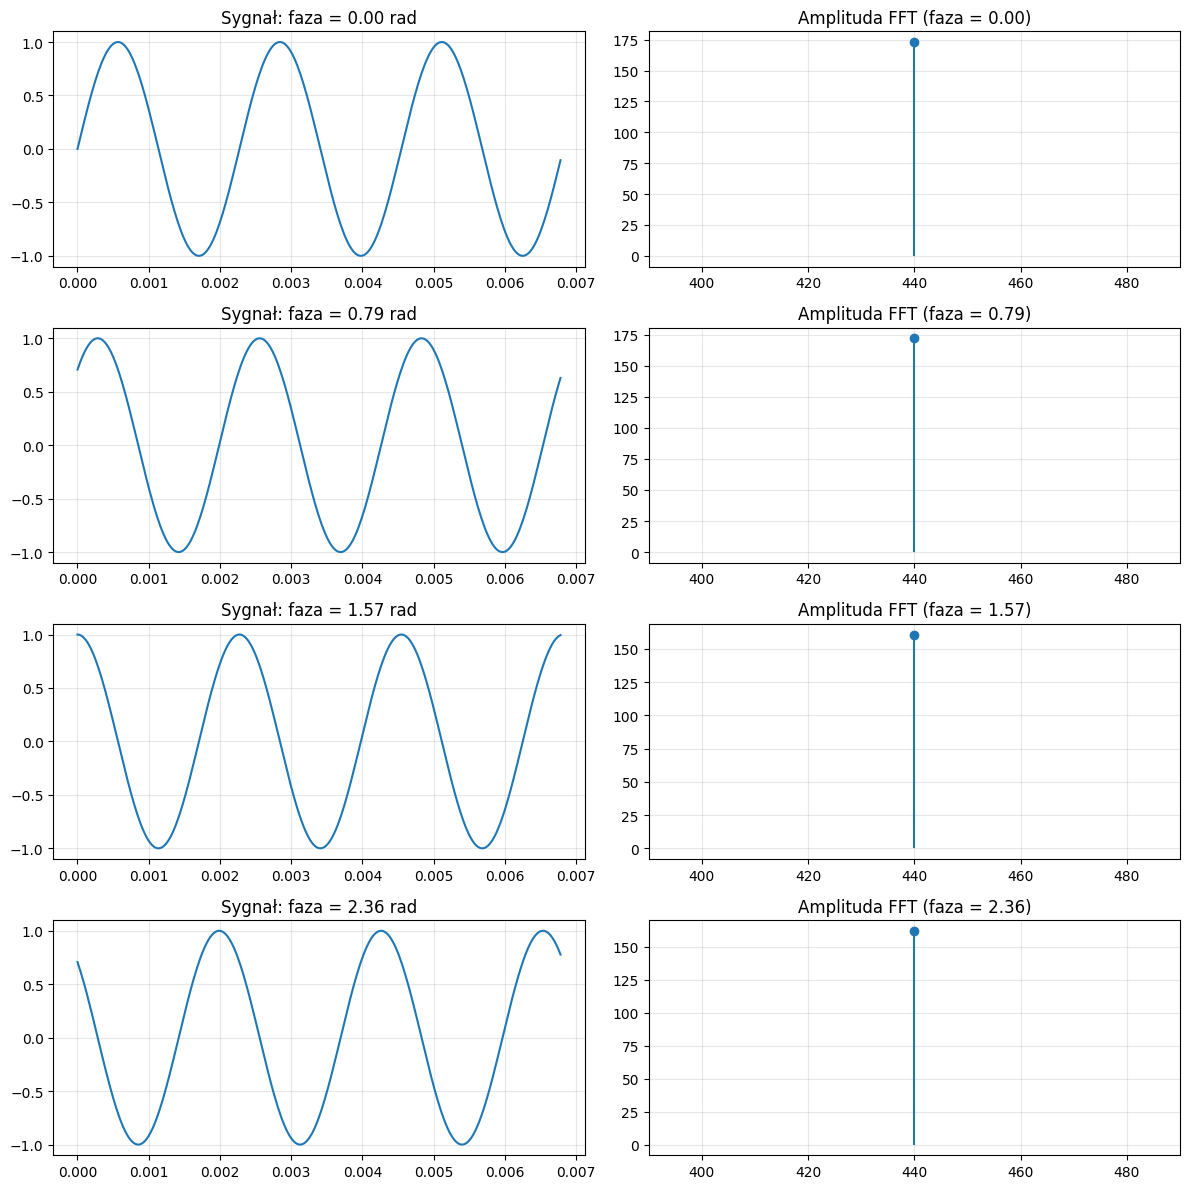

Fazy w widmie dla 440 Hz:
Faza sygnału wejściowego 0.00 rad → faza FFT = -0.29 rad
Faza sygnału wejściowego 0.79 rad → faza FFT = 0.43 rad
Faza sygnału wejściowego 1.57 rad → faza FFT = 1.22 rad
Faza sygnału wejściowego 2.36 rad → faza FFT = 2.08 rad

Amplituda po zsumowaniu (440 Hz): 434.61402314809106
Faza po zsumowaniu: 0.8134751792097072


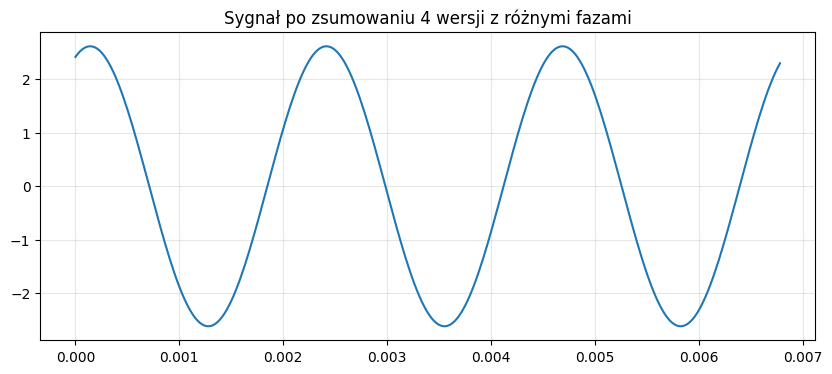

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry
fs = 44100
duration = 0.01
t = np.linspace(0, duration, int(fs*duration), endpoint=False)

freq = 440  # A4
phases = [0, np.pi/4, np.pi/2, 3*np.pi/4]

signals = []
for ph in phases:
    signals.append(np.sin(2*np.pi*freq*t + ph))

# FFT każdej wersji
ffts = [np.fft.fft(sig) for sig in signals]
freqs = np.fft.fftfreq(len(t), 1/fs)

# Indeks częstotliwości 440 Hz
idx = np.argmin(np.abs(freqs - freq))

# --- Wykresy ---
fig, axes = plt.subplots(4, 2, figsize=(12, 12))

for i, (sig, F, ph) in enumerate(zip(signals, ffts, phases)):
    # sygnał
    axes[i, 0].plot(t[:300], sig[:300])
    axes[i, 0].set_title(f"Sygnał: faza = {ph:.2f} rad")
    axes[i, 0].grid(True, alpha=0.3)

    # widmo
    amp = np.abs(F)
    phase = np.angle(F)

    axes[i, 1].stem([freq], [amp[idx]], basefmt=' ')
    axes[i, 1].set_title(f"Amplituda FFT (faza = {ph:.2f})")
    axes[i, 1].set_xlim(freq-50, freq+50)
    axes[i, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# --- Faza w widmie ---
print("Fazy w widmie dla 440 Hz:")
for ph, F in zip(phases, ffts):
    print(f"Faza sygnału wejściowego {ph:.2f} rad → faza FFT = {np.angle(F[idx]):.2f} rad")

# --- Sumowanie sygnałów ---
combined = sum(signals)
F_combined = np.fft.fft(combined)

print("\nAmplituda po zsumowaniu (440 Hz):", np.abs(F_combined[idx]))
print("Faza po zsumowaniu:", np.angle(F_combined[idx]))

plt.figure(figsize=(10,4))
plt.plot(t[:300], combined[:300])
plt.title("Sygnał po zsumowaniu 4 wersji z różnymi fazami")
plt.grid(True, alpha=0.3)
plt.show()


3

Detektyw muzyczny - rozpoznawanie akordów

Testowanie: C-dur
  Oczekiwane częstotliwości: [261.63, 329.63, 392.0]
  Wykryte częstotliwości:    ['254.50', '255.00', '255.50', '256.00', '256.50', '257.00', '257.50', '258.00', '258.50', '259.00', '259.50', '260.00', '260.50', '261.00', '261.50', '262.00', '262.50', '263.00', '263.50', '264.00', '264.50', '265.00', '265.50', '266.00', '266.50', '267.00', '324.00', '324.50', '325.00', '325.50', '326.00', '326.50', '327.00', '327.50', '328.00', '328.50', '329.00', '329.50', '330.00', '330.50', '331.00', '331.50', '332.00', '332.50', '333.00', '333.50', '334.00', '334.50', '335.00', '335.50', '336.00', '336.50', '391.50', '392.00', '392.50', '393.00']
  Rozpoznano jako:           C-dur
  Pewność:                   1467%


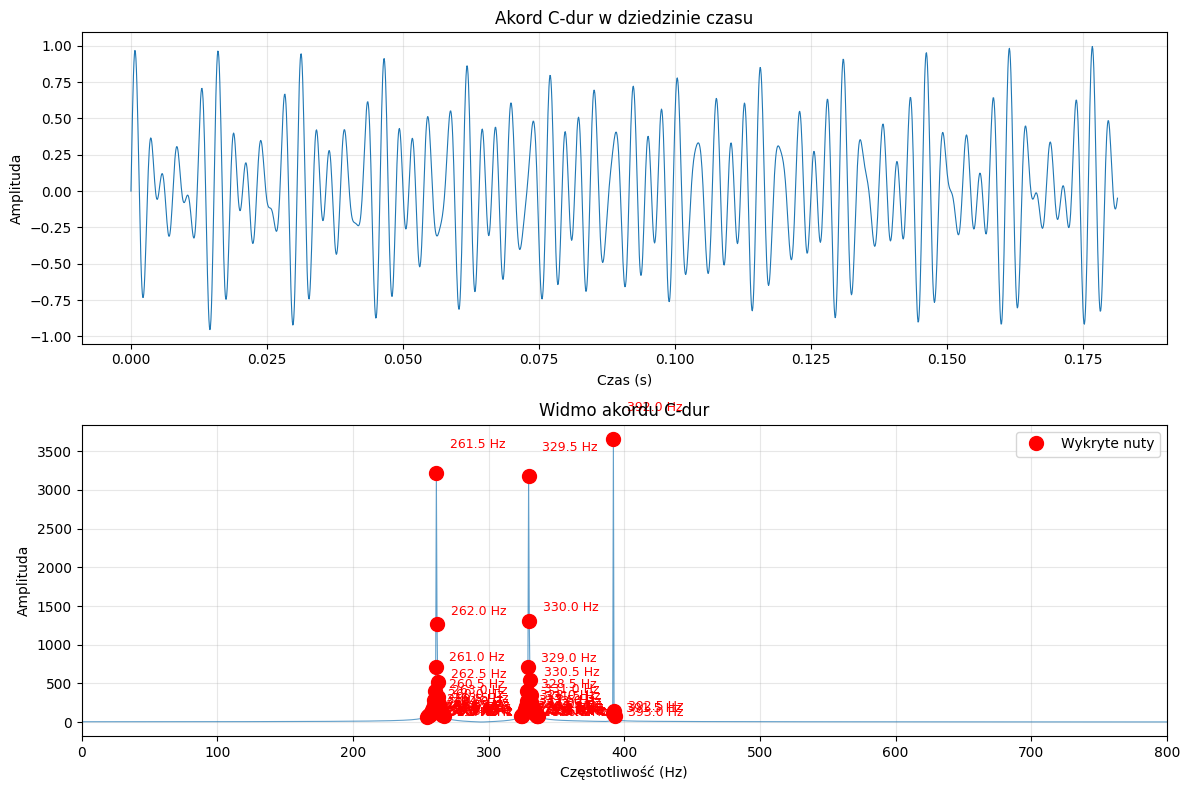


Testowanie: A-moll
  Oczekiwane częstotliwości: [220.0, 261.63, 329.63]
  Wykryte częstotliwości:    ['219.50', '220.00', '254.50', '255.00', '255.50', '256.00', '256.50', '257.00', '257.50', '258.00', '258.50', '259.00', '259.50', '260.00', '260.50', '261.00', '261.50', '262.00', '262.50', '263.00', '263.50', '264.00', '264.50', '265.00', '265.50', '266.00', '266.50', '267.00', '267.50', '324.00', '324.50', '325.00', '325.50', '326.00', '326.50', '327.00', '327.50', '328.00', '328.50', '329.00', '329.50', '330.00', '330.50', '331.00', '331.50', '332.00', '332.50', '333.00', '333.50', '334.00', '334.50', '335.00', '335.50', '336.00', '336.50', '337.00']
  Rozpoznano jako:           A-moll
  Pewność:                   1400%

Testowanie: F-dur
  Oczekiwane częstotliwości: [349.23, 440.0, 523.25]
  Wykryte częstotliwości:    ['342.50', '343.00', '343.50', '344.00', '344.50', '345.00', '345.50', '346.00', '346.50', '347.00', '347.50', '348.00', '348.50', '349.00', '349.50', '350.00', '350

In [ ]:
# Definicje akordów (częstotliwości w Hz)
CHORDS = {
    'C-dur': [261.63, 329.63, 392.00],
    'A-moll': [220.00, 261.63, 329.63],
    'F-dur': [349.23, 440.00, 523.25],
    'G-dur': [392.00, 493.88, 587.33]
}

def generate_chord(freqs, duration=1.0, framerate=11025):
    """Generuje akord jako sumę sinusoid."""
    times = np.linspace(0, duration, int(duration * framerate))
    chord = np.zeros(len(times))
    for freq in freqs:
        chord += np.sin(2*np.pi*freq*times)
    return times, chord / len(freqs)  # normalizacja

def detect_peaks(spectrum, freqs, threshold_percentile=99):
    """Wykrywa szczyty w widmie."""
    magnitude = np.abs(spectrum)
    threshold = np.percentile(magnitude, threshold_percentile)

    peaks_idx = np.where(magnitude > threshold)[0]
    peak_freqs = freqs[peaks_idx]
    peak_mags = magnitude[peaks_idx]

    # Sortowanie po częstotliwości
    sorted_idx = np.argsort(peak_freqs)
    return peak_freqs[sorted_idx], peak_mags[sorted_idx]

def identify_chord(detected_freqs, tolerance=5):
    """
    Próbuje zidentyfikować akord na podstawie wykrytych częstotliwości.

    tolerance: dopuszczalne odchylenie w Hz
    """
    best_match = None
    best_score = 0

    for chord_name, chord_freqs in CHORDS.items():
        matches = 0
        for detected in detected_freqs:
            for expected in chord_freqs:
                if abs(detected - expected) < tolerance:
                    matches += 1
                    break

        score = matches / len(chord_freqs)
        if score > best_score:
            best_score = score
            best_match = chord_name

    return best_match, best_score

# Test na wszystkich akordach
print("Detektyw muzyczny - rozpoznawanie akordów")
print("=" * 60)

for chord_name, chord_freqs in CHORDS.items():
    # Generowanie akordu
    times, chord = generate_chord(chord_freqs, duration=2.0)

    # FFT
    spectrum = np.fft.rfft(chord)
    freqs = np.fft.rfftfreq(len(chord), 1/11025)

    # Wykrywanie szczytów
    detected_freqs, detected_mags = detect_peaks(spectrum, freqs, threshold_percentile=99.5)

    # Identyfikacja
    identified, score = identify_chord(detected_freqs)

    print(f"\nTestowanie: {chord_name}")
    print(f"  Oczekiwane częstotliwości: {chord_freqs}")
    print(f"  Wykryte częstotliwości:    {[f'{f:.2f}' for f in detected_freqs]}")
    print(f"  Rozpoznano jako:           {identified}")
    print(f"  Pewność:                   {score*100:.0f}%")

    # Wykres dla pierwszego akordu
    if chord_name == list(CHORDS.keys())[0]:
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

        # Przebieg czasowy
        ax1.plot(times[:2000], chord[:2000], linewidth=0.8)
        ax1.set_xlabel('Czas (s)')
        ax1.set_ylabel('Amplituda')
        ax1.set_title(f'Akord {chord_name} w dziedzinie czasu')
        ax1.grid(True, alpha=0.3)

        # Widmo
        magnitude = np.abs(spectrum)
        ax2.plot(freqs, magnitude, linewidth=0.8, alpha=0.7)
        ax2.plot(detected_freqs, detected_mags, 'ro',
                markersize=10, label='Wykryte nuty')

        # Adnotacje
        for freq, mag in zip(detected_freqs, detected_mags):
            ax2.annotate(f'{freq:.1f} Hz',
                        xy=(freq, mag),
                        xytext=(freq+10, mag+mag*0.1),
                        fontsize=9, color='red')

        ax2.set_xlabel('Częstotliwość (Hz)')
        ax2.set_ylabel('Amplituda')
        ax2.set_title(f'Widmo akordu {chord_name}')
        ax2.set_xlim(0, 800)
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

print("\n" + "=" * 60)
print("Detektyw muzyczny rozwiązał wszystkie przypadki!")

4

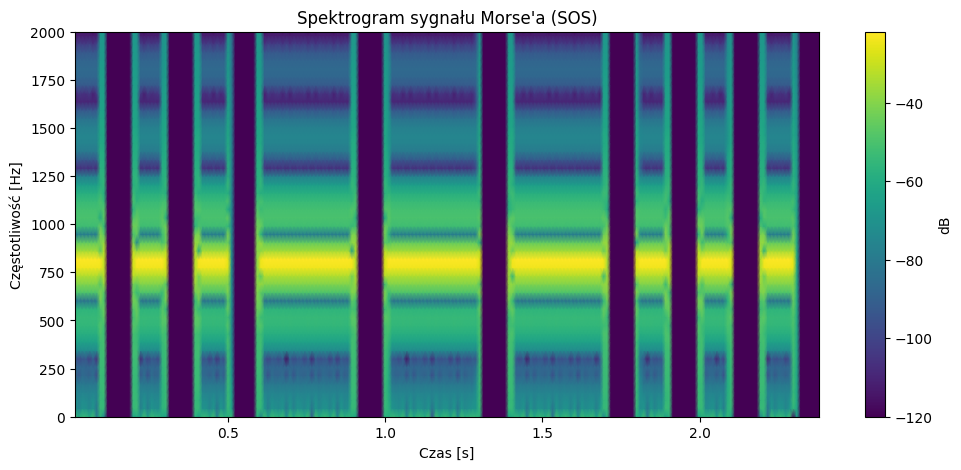

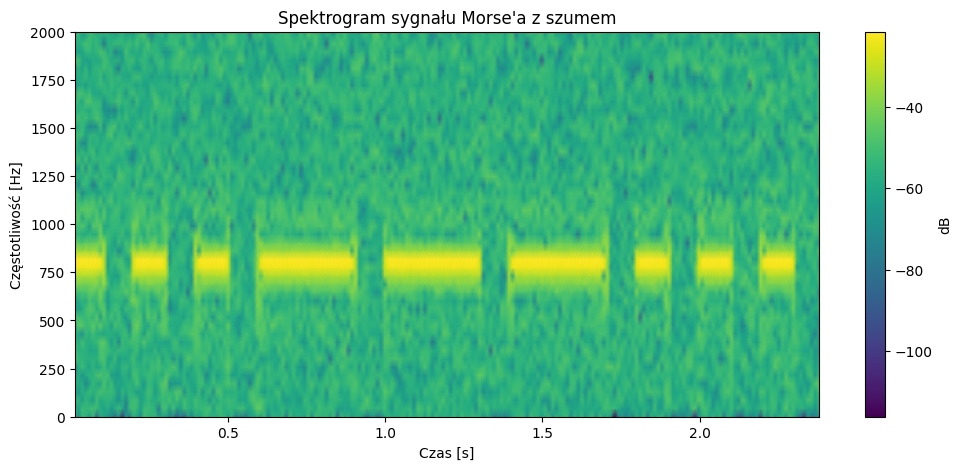

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# --- Parametry ---
fs = 44100
freq = 800  # ton Morse'a
dot = 0.1
dash = 0.3
gap = 0.1

MORSE_CODE = {
    'S': '...',
    'O': '---',
    'A': '.-',
    'B': '-...',
}

# --- Funkcja generująca ton ---
def tone(duration):
    t = np.linspace(0, duration, int(fs*duration), endpoint=False)
    return np.sin(2*np.pi*freq*t)

def silence(duration):
    return np.zeros(int(fs*duration))

# --- Kodowanie wiadomości ---
def encode_morse(message):
    signal = np.array([])
    for char in message:
        if char == ' ':
            signal = np.concatenate([signal, silence(3*gap)])
            continue

        pattern = MORSE_CODE.get(char.upper(), '')
        for symbol in pattern:
            if symbol == '.':
                signal = np.concatenate([signal, tone(dot)])
            elif symbol == '-':
                signal = np.concatenate([signal, tone(dash)])
            signal = np.concatenate([signal, silence(gap)])
    return signal

# --- Generacja sygnału ---
message = "SOS"
signal = encode_morse(message)

# --- Spektrogram ---
f, t, Sxx = spectrogram(signal, fs=fs, nperseg=1024, noverlap=512)

plt.figure(figsize=(12,5))
plt.pcolormesh(t, f, 10*np.log10(Sxx+1e-12), shading='gouraud')
plt.title("Spektrogram sygnału Morse'a (SOS)")
plt.ylabel("Częstotliwość [Hz]")
plt.xlabel("Czas [s]")
plt.ylim(0, 2000)
plt.colorbar(label='dB')
plt.show()

# --- Dodanie szumu ---
noise = np.random.normal(0, 0.3, len(signal))
noisy_signal = signal + noise

# --- Spektrogram z szumem ---
f2, t2, Sxx2 = spectrogram(noisy_signal, fs=fs, nperseg=1024, noverlap=512)

plt.figure(figsize=(12,5))
plt.pcolormesh(t2, f2, 10*np.log10(Sxx2+1e-12), shading='gouraud')
plt.title("Spektrogram sygnału Morse'a z szumem")
plt.ylabel("Częstotliwość [Hz]")
plt.xlabel("Czas [s]")
plt.ylim(0, 2000)
plt.colorbar(label='dB')
plt.show()


5

Wykryta częstotliwość szumu: 99.50 Hz
(oczekiwano: 120 Hz)

SNR przed filtrowaniem: 0.00 dB
SNR po filtrowaniu:     46.47 dB
Poprawa:                46.47 dB


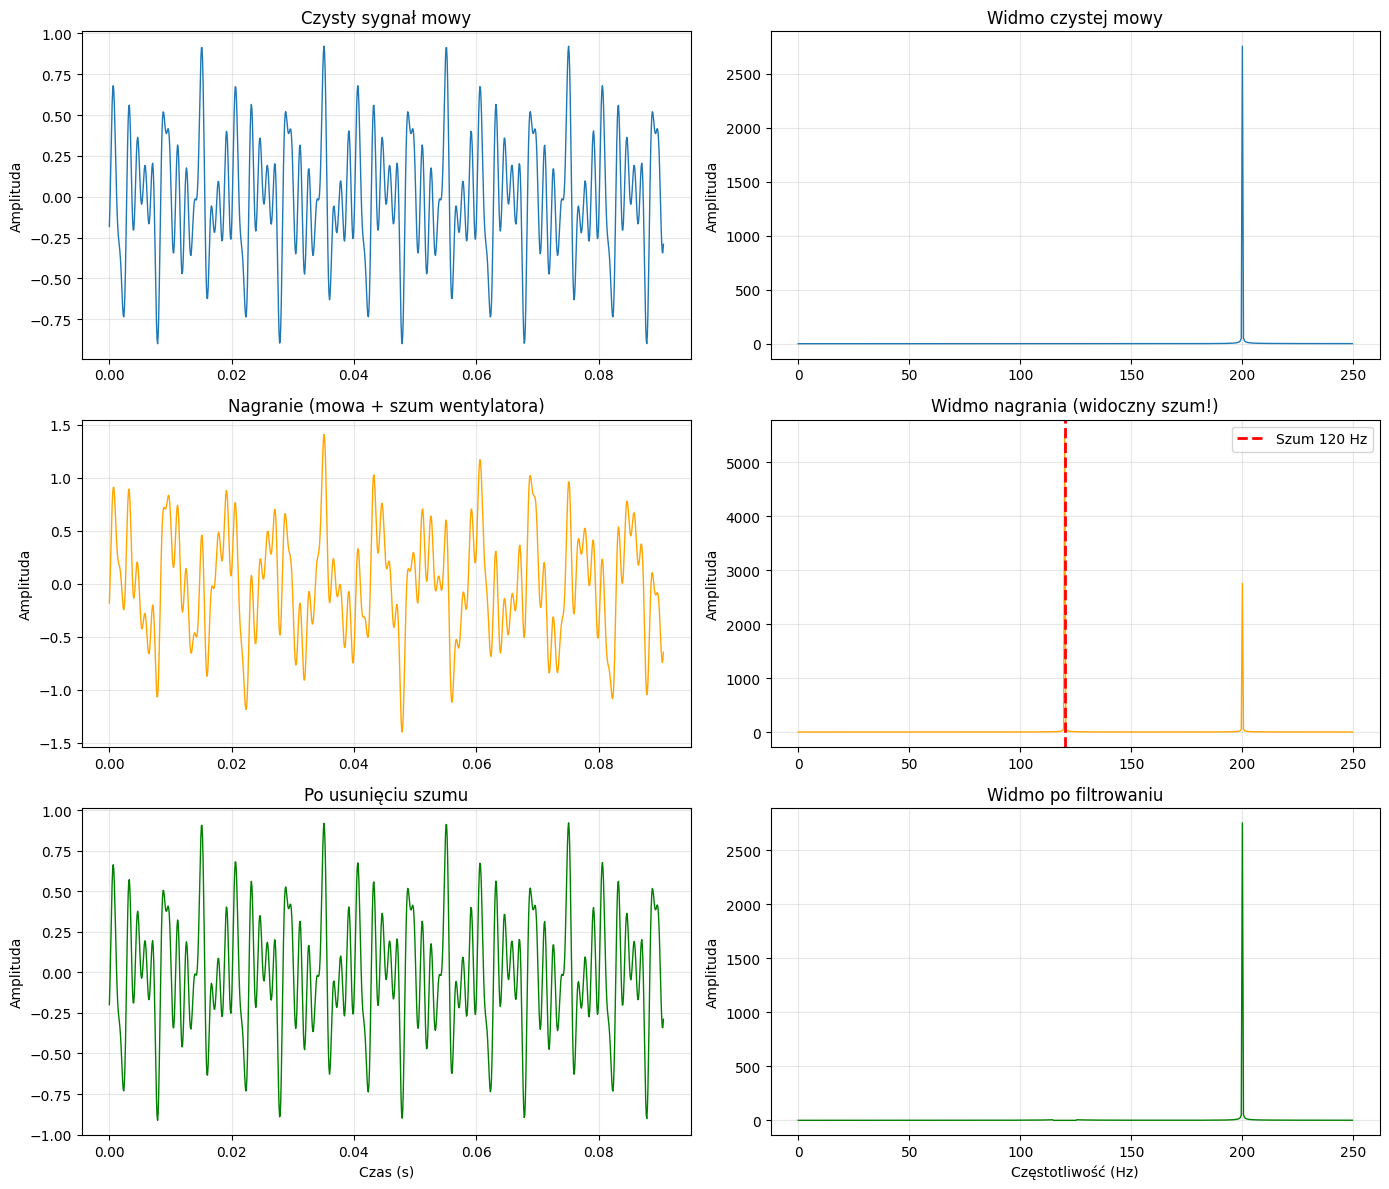


Wniosek: FFT pozwala precyzyjnie usunąć szum o znanej częstotliwości!
To jest podstawa systemów redukcji szumu w słuchawkach i telefonach!


In [ ]:
def calculate_snr(signal, noise):
    """Oblicza stosunek sygnału do szumu (SNR) w dB."""
    signal_power = np.mean(signal**2)
    noise_power = np.mean(noise**2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

# Parametry
duration = 2.0
framerate = 11025
times = np.linspace(0, duration, int(duration * framerate))

# "Mowa" - suma kilku częstotliwości (symulacja)
speech_freqs = [200, 350, 500, 750]
speech = np.zeros(len(times))
for freq in speech_freqs:
    speech += np.sin(2*np.pi*freq*times + np.random.rand()*2*np.pi)
speech /= len(speech_freqs)

# Szum wentylatora - 120 Hz
fan_noise_freq = 120
fan_noise = 0.5 * np.sin(2*np.pi*fan_noise_freq*times)

# Nagranie = mowa + szum
recording = speech + fan_noise

# SNR przed filtrowaniem
snr_before = calculate_snr(speech, fan_noise)

# FFT nagrania
spectrum = np.fft.rfft(recording)
freqs = np.fft.rfftfreq(len(recording), 1/framerate)

# Znajdowanie częstotliwości szumu
magnitude = np.abs(spectrum)
noise_idx = np.argmax(magnitude[:200])  # szukamy w niskich częstotliwościach
detected_noise_freq = freqs[noise_idx]

print(f"Wykryta częstotliwość szumu: {detected_noise_freq:.2f} Hz")
print(f"(oczekiwano: {fan_noise_freq} Hz)")

# Filtrowanie - wyzerowanie składowej szumu
# Znajdujemy indeksy w okolicy 120 Hz (±5 Hz)
bandwidth = 5  # Hz
noise_band = (freqs >= fan_noise_freq - bandwidth) & (freqs <= fan_noise_freq + bandwidth)
spectrum_filtered = spectrum.copy()
spectrum_filtered[noise_band] = 0

# Odwrotna FFT
cleaned_signal = np.fft.irfft(spectrum_filtered)

# SNR po filtrowaniu
residual_noise = cleaned_signal - speech
snr_after = calculate_snr(speech, residual_noise)

print(f"\nSNR przed filtrowaniem: {snr_before:.2f} dB")
print(f"SNR po filtrowaniu:     {snr_after:.2f} dB")
print(f"Poprawa:                {snr_after - snr_before:.2f} dB")

# Wykres
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Kolumna 1: Przebiegi czasowe
axes[0, 0].plot(times[:1000], speech[:1000], linewidth=1)
axes[0, 0].set_title('Czysty sygnał mowy')
axes[0, 0].set_ylabel('Amplituda')
axes[0, 0].grid(True, alpha=0.3)

axes[1, 0].plot(times[:1000], recording[:1000], linewidth=1, color='orange')
axes[1, 0].set_title('Nagranie (mowa + szum wentylatora)')
axes[1, 0].set_ylabel('Amplituda')
axes[1, 0].grid(True, alpha=0.3)

axes[2, 0].plot(times[:1000], cleaned_signal[:1000], linewidth=1, color='green')
axes[2, 0].set_title('Po usunięciu szumu')
axes[2, 0].set_xlabel('Czas (s)')
axes[2, 0].set_ylabel('Amplituda')
axes[2, 0].grid(True, alpha=0.3)

# Kolumna 2: Widma
axes[0, 1].plot(freqs[:500], np.abs(np.fft.rfft(speech))[:500], linewidth=1)
axes[0, 1].set_title('Widmo czystej mowy')
axes[0, 1].set_ylabel('Amplituda')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 1].plot(freqs[:500], magnitude[:500], linewidth=1, color='orange')
axes[1, 1].axvline(x=fan_noise_freq, color='r', linestyle='--',
                  linewidth=2, label=f'Szum {fan_noise_freq} Hz')
axes[1, 1].set_title('Widmo nagrania (widoczny szum!)')
axes[1, 1].set_ylabel('Amplituda')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

axes[2, 1].plot(freqs[:500], np.abs(spectrum_filtered)[:500],
               linewidth=1, color='green')
axes[2, 1].set_title('Widmo po filtrowaniu')
axes[2, 1].set_xlabel('Częstotliwość (Hz)')
axes[2, 1].set_ylabel('Amplituda')
axes[2, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nWniosek: FFT pozwala precyzyjnie usunąć szum o znanej częstotliwości!")
print("To jest podstawa systemów redukcji szumu w słuchawkach i telefonach!")

6

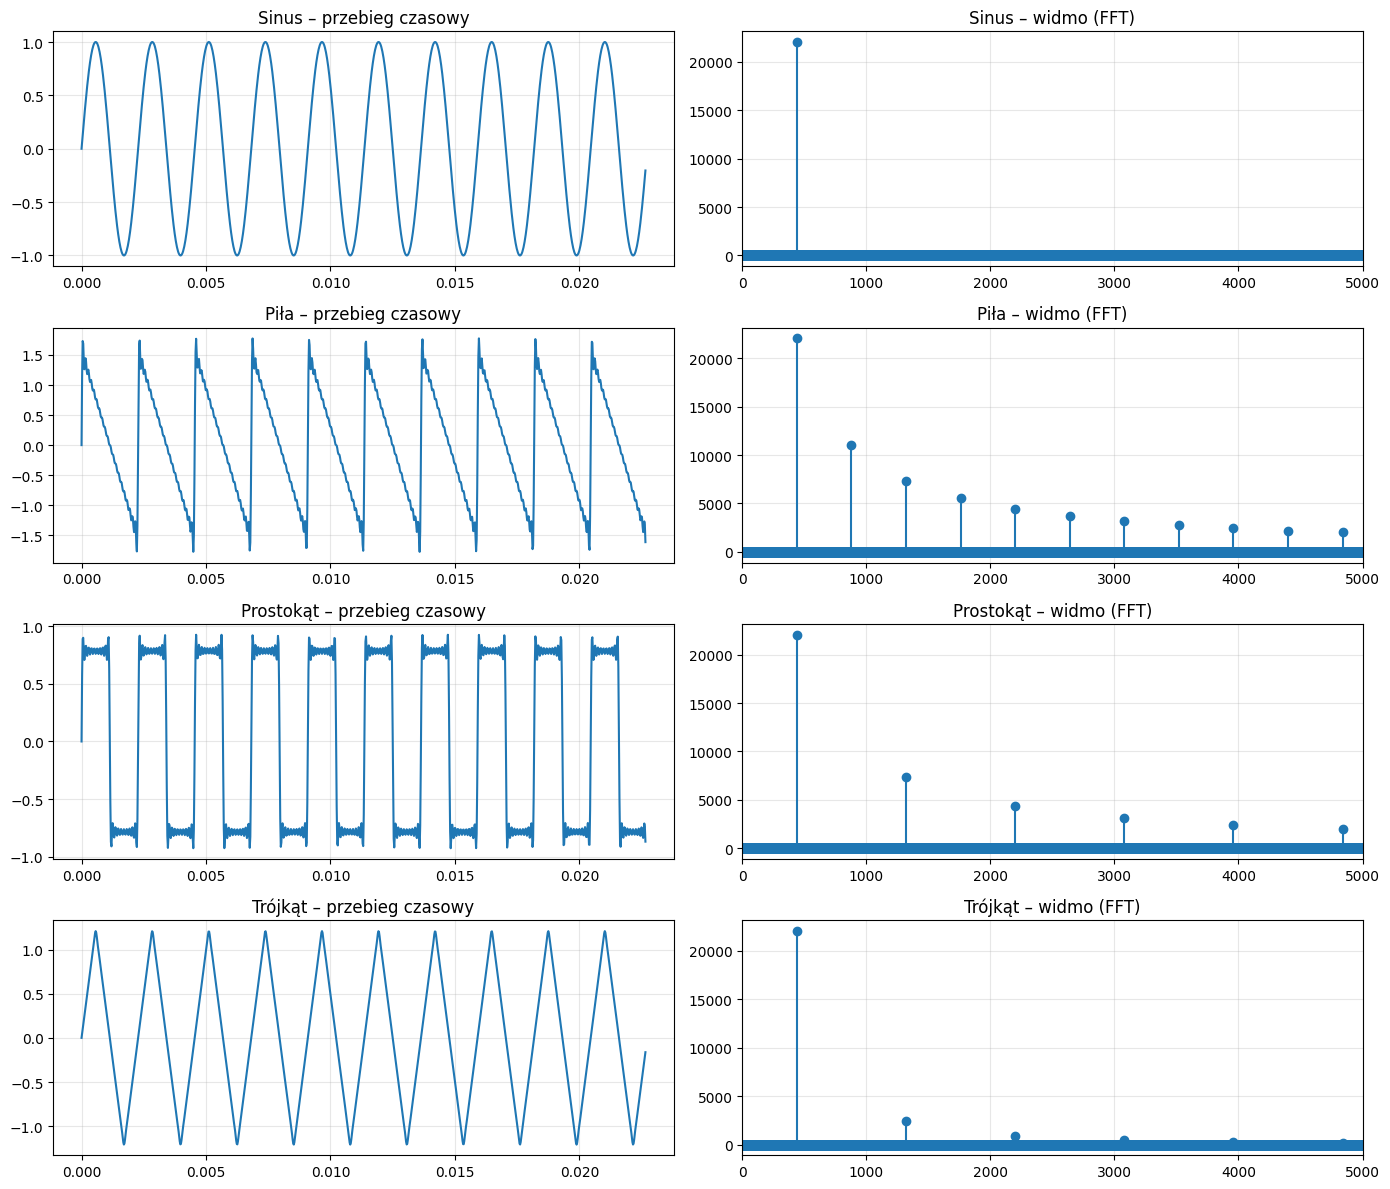

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parametry ---
fs = 44100
duration = 1.0
t = np.linspace(0, duration, int(fs*duration), endpoint=False)
f0 = 440
N = 20  # liczba harmonicznych

# Ton sinusoidalny
sine_wave = np.sin(2*np.pi*f0*t)

# Fala piłokształtna
saw_wave = np.zeros_like(t)
for k in range(1, N+1):
    saw_wave += (1/k) * np.sin(2*np.pi*f0*k*t)

# Fala prostokątna
square_wave = np.zeros_like(t)
for k in range(1, N+1, 2):
    square_wave += (1/k) * np.sin(2*np.pi*f0*k*t)

# Fala trójkątna
triangle_wave = np.zeros_like(t)
for i, k in enumerate(range(1, N+1, 2)):
    sign = (-1)**((i % 2))
    triangle_wave += sign * (1/(k*k)) * np.sin(2*np.pi*f0*k*t)

# FFT
def spectrum(x):
    X = np.fft.fft(x)
    freqs = np.fft.fftfreq(len(x), 1/fs)
    return freqs[:5000], np.abs(X)[:5000]

freq_sine, spec_sine = spectrum(sine_wave)
freq_saw, spec_saw = spectrum(saw_wave)
freq_square, spec_square = spectrum(square_wave)
freq_triangle, spec_triangle = spectrum(triangle_wave)


fig, axes = plt.subplots(4, 2, figsize=(14, 12))

waves = [sine_wave, saw_wave, square_wave, triangle_wave]
specs = [(freq_sine, spec_sine),
         (freq_saw, spec_saw),
         (freq_square, spec_square),
         (freq_triangle, spec_triangle)]
titles = ["Sinus", "Piła", "Prostokąt", "Trójkąt"]

for i in range(4):
    # sygnał czasowy
    axes[i, 0].plot(t[:1000], waves[i][:1000])
    axes[i, 0].set_title(f"{titles[i]} – przebieg czasowy")
    axes[i, 0].grid(True, alpha=0.3)

    # widmo
    f, S = specs[i]
    axes[i, 1].stem(f, S, basefmt=' ')
    axes[i, 1].set_xlim(0, 5000)
    axes[i, 1].set_title(f"{titles[i]} – widmo (FFT)")
    axes[i, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


7

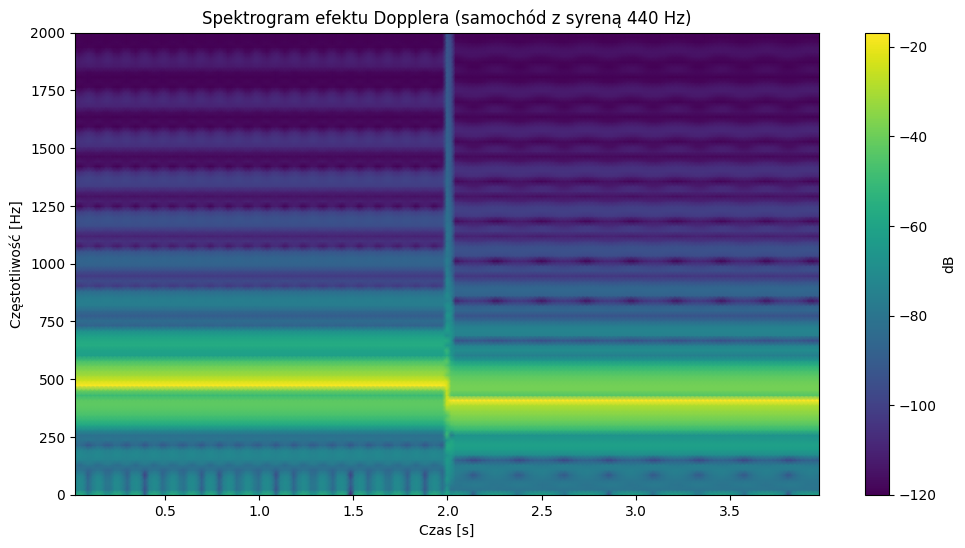

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Parametry
fs = 44100
duration = 4.0
t = np.linspace(0, duration, int(fs*duration), endpoint=False)

f0 = 440
v_sound = 343
v_source = 100/3.6  # 100 km/h -> m/s

# Częstotliwość obserwowana
# Załóżmy, że samochód mija obserwatora w połowie czasu
t_mid = duration / 2

freq_obs = np.zeros_like(t)

for i, ti in enumerate(t):
    if ti < t_mid:
        # zbliża się
        freq_obs[i] = f0 * (v_sound / (v_sound - v_source))
    else:
        # oddala się
        freq_obs[i] = f0 * (v_sound / (v_sound + v_source))

# Generacja sygnału
phase = np.cumsum(freq_obs) / fs
signal = np.sin(2*np.pi*phase)

# Spektrogram
f, tt, Sxx = spectrogram(signal, fs=fs, nperseg=2048, noverlap=1024)

plt.figure(figsize=(12,6))
plt.pcolormesh(tt, f, 10*np.log10(Sxx+1e-12), shading='gouraud')
plt.title("Spektrogram efektu Dopplera (samochód z syreną 440 Hz)")
plt.xlabel("Czas [s]")
plt.ylabel("Częstotliwość [Hz]")
plt.ylim(0, 2000)
plt.colorbar(label="dB")
plt.show()
